In [1]:
# 安装seaborn到conda

# Histograms

In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(array([  2.,  13.,   9.,   9.,  16.,  13.,  18.,   8.,   7.,   5.]),
 array([-1.81787273, -1.43352639, -1.04918004, -0.6648337 , -0.28048735,
         0.10385899,  0.48820534,  0.87255168,  1.25689803,  1.64124438,
         2.02559072]),
 <a list of 10 Patch objects>)

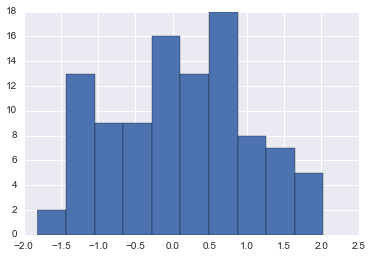

In [3]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

# 默认上，会分布十个区间，然后查看这十个区间的分布情况

(array([  4.,   6.,  11.,  12.,  15.,  10.,  11.,   6.,   3.,   2.]),
 array([-1.96099641, -1.51018785, -1.0593793 , -0.60857074, -0.15776219,
         0.29304637,  0.74385492,  1.19466348,  1.64547203,  2.09628059,
         2.54708914]),
 <a list of 10 Patch objects>)

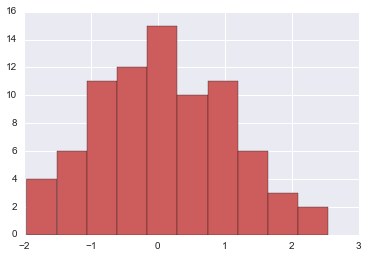

In [4]:
# Lets make another dataset
dataset2 = randn(80)

#Plot
plt.hist(dataset2,color='indianred')

(array([ 0.11091183,  0.11091183,  0.11091183,  0.22182365,  0.38819139,
         0.22182365,  0.4436473 ,  0.22182365,  0.33273548,  0.49910322,
         0.33273548,  0.22182365,  0.33273548,  0.27727956,  0.22182365,
         0.11091183,  0.        ,  0.16636774,  0.05545591,  0.05545591]),
 array([-1.96099641, -1.73559213, -1.51018785, -1.28478358, -1.0593793 ,
        -0.83397502, -0.60857074, -0.38316647, -0.15776219,  0.06764209,
         0.29304637,  0.51845064,  0.74385492,  0.9692592 ,  1.19466348,
         1.42006776,  1.64547203,  1.87087631,  2.09628059,  2.32168487,
         2.54708914]),
 <a list of 20 Patch objects>)

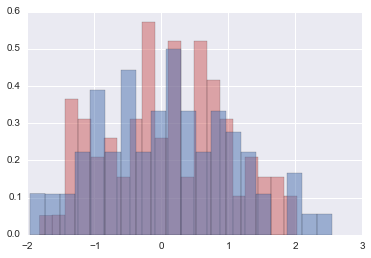

In [5]:
# We can use normed to plot on same plot

# Set normed=True for the plots to be normalized in order to comapre data sets with different number of observations
# Set alpha=0.5 for transperancy

plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

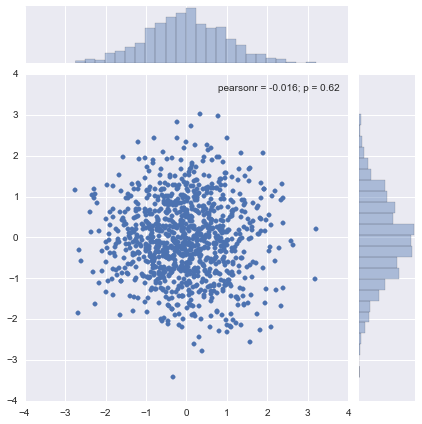

In [6]:
# Make two more random normal dist data sets
data1 = randn(1000)
data2 = randn(1000)

#Can represent joint distributions using joint plots
sns.jointplot(data1,data2)

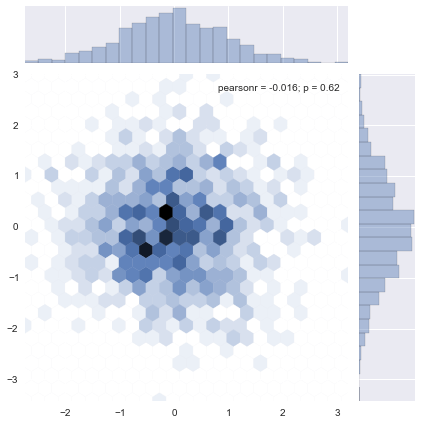

In [7]:
# Can also use hex bins for a more concise picture
sns.jointplot(data1,data2,kind='hex')

# Kernel Density Estimation Plots

In [8]:
# 核密度估计
# http://www.lifelaf.com/blog/?p=723

In [9]:
# First we'll learn how to understand and make a KDE plot manually, and then we'll see how to do it quickly with seaborn!
# Let's start off with a carpet/rug plot
# A rug plot simpot puts ticks wherever a value occured

#Create dataset
dataset = randn(25)
dataset

array([-0.62653602, -0.46799129,  0.49885961, -1.92090229,  0.9225344 ,
        0.3542353 , -0.13237146, -0.7366466 ,  1.19359329, -0.65933547,
        0.45103819, -0.08902528, -0.20540967,  0.48687904, -0.47100582,
       -0.21880424,  1.02647327, -0.09875306,  0.33530906,  0.21319138,
       -1.18450152, -1.08453687, -0.48380725, -0.36339069,  0.64704987])

(0, 1)

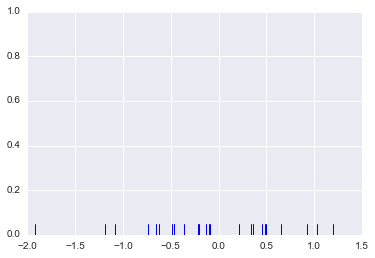

In [11]:
#Create rugplot
sns.rugplot(dataset)
#Set y-axis limit
plt.ylim(0,1)

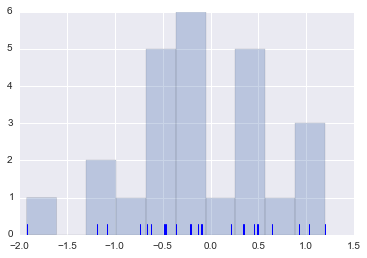

In [12]:
# Plot a histogram on top of 
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

In [13]:
# The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar
# The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually

(0, 1)

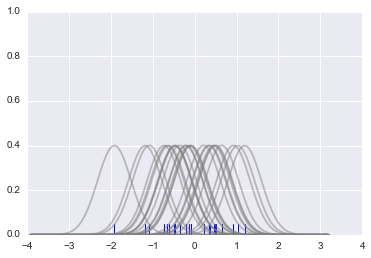

In [14]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

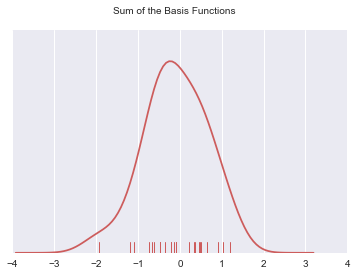

In [16]:
# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

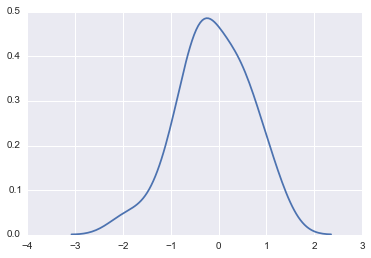

In [17]:
# Now we can see how to do it in one step with seaborn! Awesome!
sns.kdeplot(dataset)

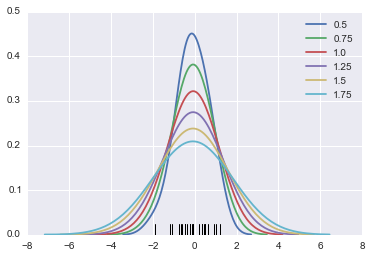

In [18]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

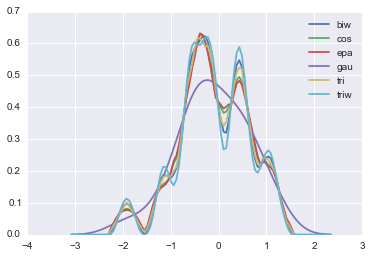

In [19]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

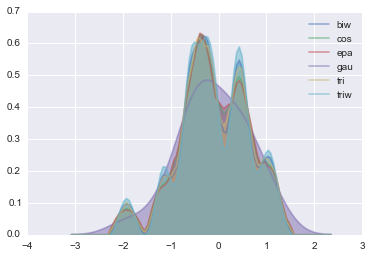

In [20]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

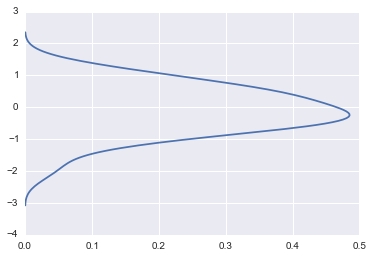

In [21]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

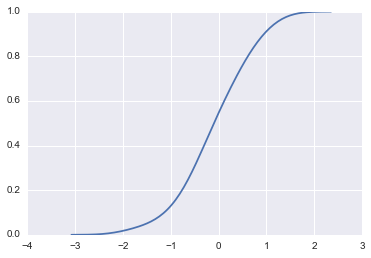

In [22]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

In [23]:
# Multivariate Density Estimation using kdeplot
# We can also use kdeplot for multidimensional data. Lets see how it works!

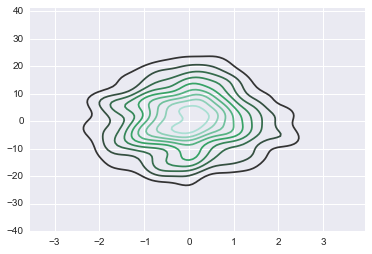

In [24]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

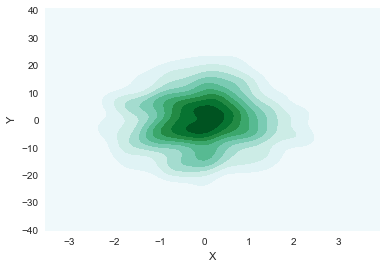

In [25]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

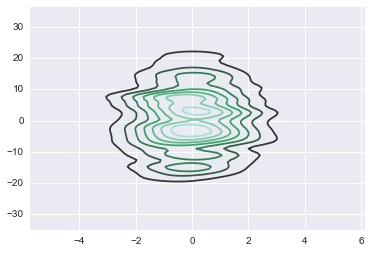

In [27]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe,bw=1)

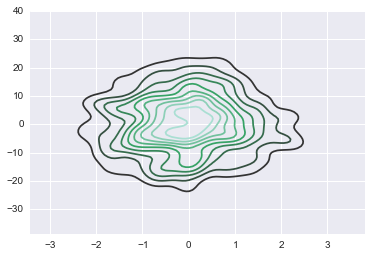

In [28]:
# Or just use silverman again
sns.kdeplot(dframe,bw='silverman')

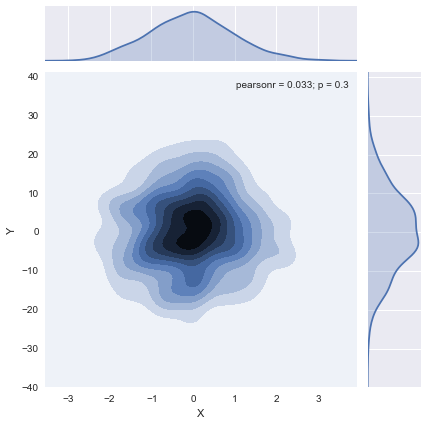

In [29]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')

# Combining Plot Styles

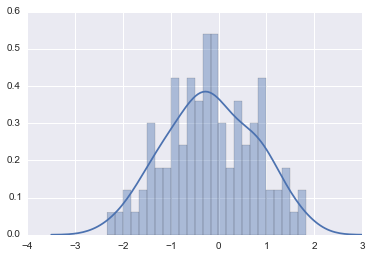

In [30]:
# Create datset
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25)

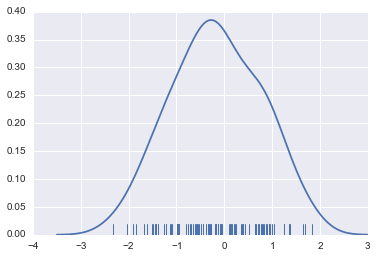

In [31]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

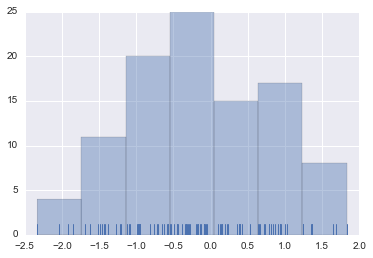

In [34]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=True, kde=False)

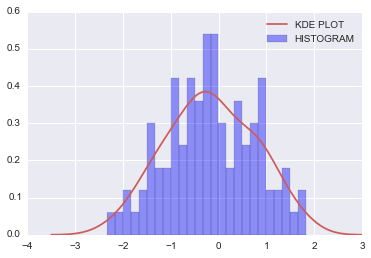

In [35]:
# TO control specific plots in distplot, use [plot]_kws argument with dictionaries.

#Here's an example

sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [36]:
# WE can also use pandas data objects for this

from pandas import Series

# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

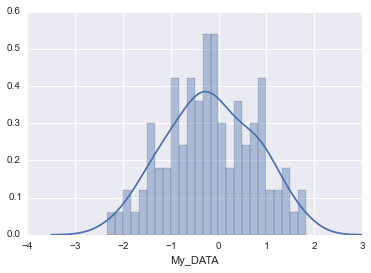

In [37]:
# Plot Series
sns.distplot(ser1,bins=25)

# Box and Violin Plots

In [38]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 # Off set the mean

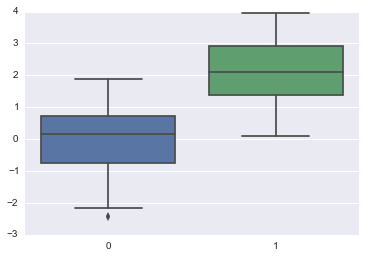

In [43]:
# Now we can create a box plot
sns.boxplot(data=[data1,data2], whis=True)

# sns新版本用法

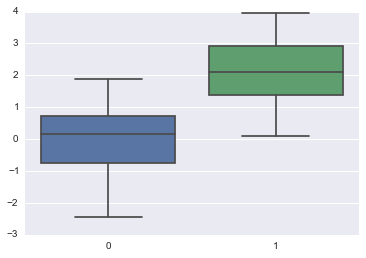

In [42]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot(data=[data1,data2],whis=np.inf)

C:\Users\Wen Weikun\Anaconda\lib\site-packages\seaborn\categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


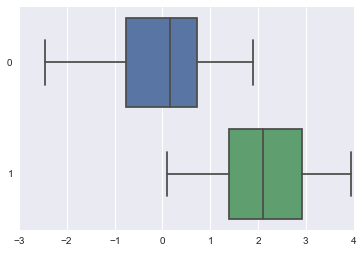

In [44]:
# WE can also set horizontal by setting vertical to false
sns.boxplot(data = [data1,data2],whis=np.inf, vert = False)

In [45]:
# While box plots are great, they can sometimes not give the full picture

# Violin/Viola plots can combine the simplicity of a box plot with the information of a kde plot

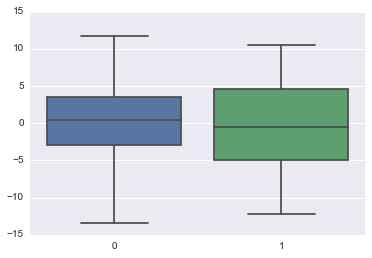

In [46]:
# Let's create an example where a box plot doesn't give the whole picture

# Normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot them
sns.boxplot(data = [data1,data2],whis=np.inf)

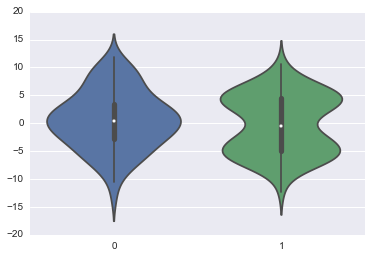

In [48]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(data = [data1,data2])

In [49]:
# 箱线图只是展示了分位数的位置，小提琴图展示了任意位置的密度，通过小提琴图我们可以知道哪些位置的密度较高

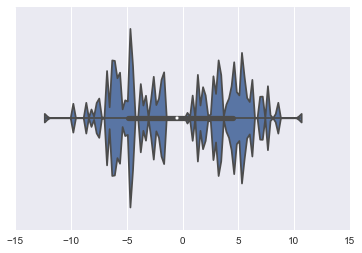

In [50]:
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
sns.violinplot(data2,bw=0.01)

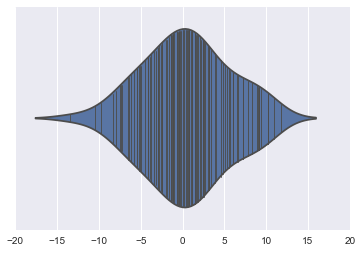

In [51]:
# Much like a rug plot, we can also include the individual points, or sticks
sns.violinplot(data1,inner="stick")

# Regression Plots

In [52]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [53]:
# seaborn 自带的示例dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


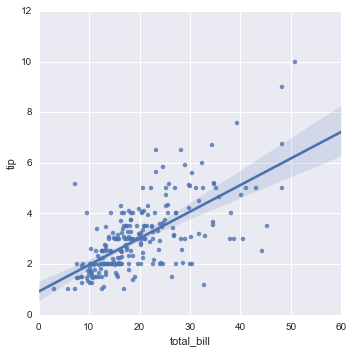

In [54]:
# Let's use lmplot() to plot the total bill versus tips
sns.lmplot("total_bill","tip",tips)

In [55]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

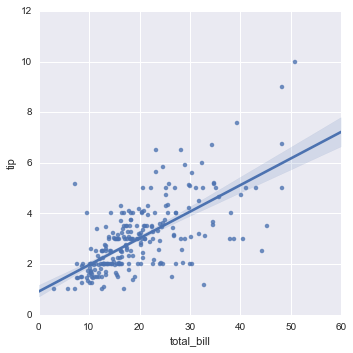

In [56]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci 

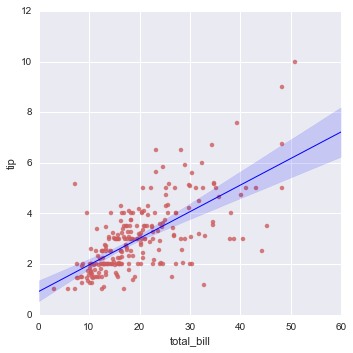

In [57]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

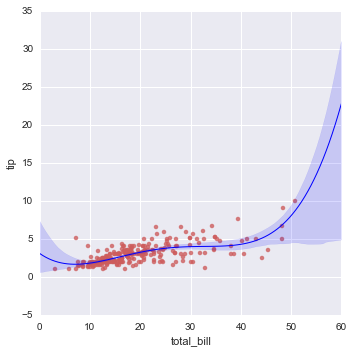

In [58]:
# WE can also check out higher-order trends
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

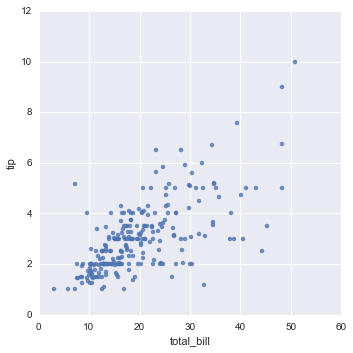

In [59]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

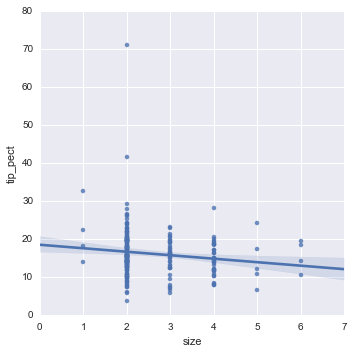

In [60]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

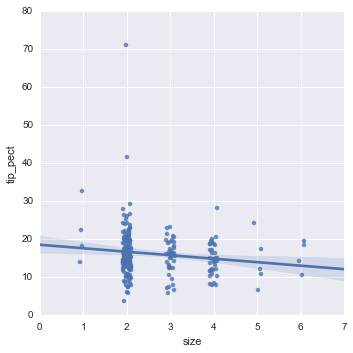

In [61]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

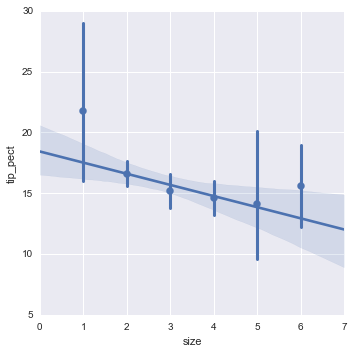

In [62]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

In [ ]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

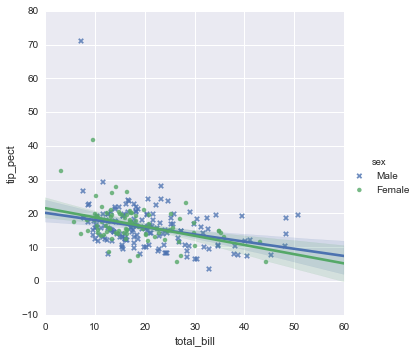

In [63]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

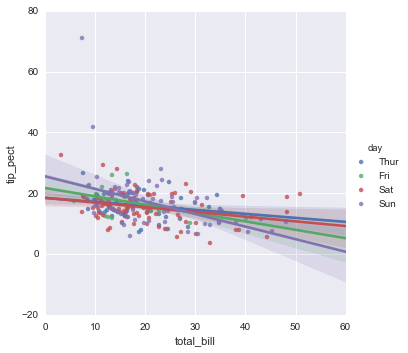

In [64]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

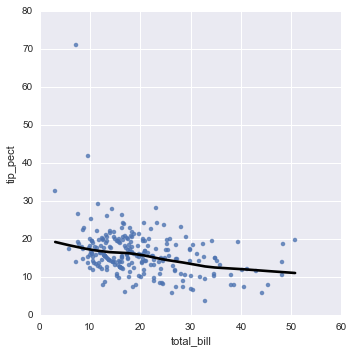

In [65]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});